Homework 4

Kishan Sarpangala

Question 1

Consider the wine datasets given at this LINK.  One dataset at this site is for red wines and the other is for white wines. 
Data has eleven features and the twelfth column is the target attribute: “wine-quality”. The values of wine-quality range 
between 0 and 10. The goal of this task is to learn a regression model that predicts “wine-quality” for a given set of features. 
Consider the white wine dataset and perform the following tasks with this dataset. 
Use Matlab or Python SKLearn libraries to perform these tasks.

#Reading in the Libraries 

In [ ]:
import matplotlib.pyplot as plt  # to plot graphs
import pandas as pd
import numpy as np               # for numerical calculations
from sklearn.utils import shuffle   # to shuffle data
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans  # to import decision tree function
from sklearn.metrics import accuracy_score       # to import accuracy function
from scipy.cluster.vq import vq
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pylab as plt
#from sklearn.cross_validation import train_test_split #deprecated module, updated module used below
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1.A
#### Do linear regression to learn the single-feature regression models, one model for each of the 11 features. Find the R2 and AIC values for each of these models. Report these values for the models.

### [Marks 8]

In [ ]:
data_red = pd.read_csv('C:/Users/kisha/Documents/Intelligent_Data_Analysis/Assignment_4/winequality-red.csv', sep = ';')
data_red.head()

In [ ]:
# Present the dataset
print (data_red.describe())

In [ ]:
# Calculate pairwise correlation matrix to see how 
#different variables are related to quality
print (data_red.corr())

In [ ]:
data_white = pd.read_csv('C:/Users/kisha/Documents/Intelligent_Data_Analysis/Assignment_4/winequality-white.csv', sep = ';')
data_white.head()

In [ ]:
# Present the dataset
print (data_white.describe())

In [ ]:
# Calculate pairwise correlation matrix to see how 
#different variables are related to quality
print (data_white.corr())

In [ ]:
wine_data = pd.concat([data_red, data_white], axis=0)
wine_data.head()

In [ ]:
wine_data.describe()

All columns has the same number of data points which is 6497, so it looks like there are no missing data.
Are there duplicated rows in the data?

In [ ]:
extra = wine_data[wine_data.duplicated()]
extra.shape

There are 1179 duplicates. 
Probably its best to keep these extra data. I think quality ratings for the similar wine were given by different wine tasters.

In [ ]:
# Let's proceed to separate 'quality' as the target variable and the rest as features.
y = wine_data.quality                  # set 'quality' as target
X = wine_data.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape)           # check correctness

In [ ]:
# data.hist(figsize=(10,10))
sns.set()
wine_data.hist(figsize=(10,10), color='purple')
plt.show()

If you look carefully we will notice that the quality are in discrete numbers & not a continous variable. 
Most of the wine are rated '5' & '6.5', with much fewer in the other numbers. 
Let's now look at the correlation among the variables using Correlation chart.


In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(wine_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

Observations:
Alcohol has the highest correlation with wine quality, followed by citric acid, Sulpahte in general (free sulphar dioxide, sulphates), pH 
Let's use all the features in the classifiers.

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('wine_data.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
wine_data.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
wine_data['alcohol'].value_counts().head(10).plot.bar()

In [ ]:
#Split the data into training and testing sets
Features = wine_data[list(wine_data.columns)[:-1]]
Quality = wine_data['quality']
Features_train, Features_test, Quality_train, Quality_test = train_test_split(Features, Quality)

In [ ]:
regressor = LinearRegression()
regressor.fit(Features_train, Quality_train)

In [ ]:
#Evaluate the predictions of the model
Quality_predictions = regressor.predict(Features_test)

In [ ]:
import statsmodels.formula.api as sm

model1=sm.OLS(Quality_train, Features_train)
result = model1.fit()
result.summary()

In [ ]:
plt.scatter(Quality_test, Quality_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()

In [ ]:
import math  
# Have a look at R sq to give an idea of the fit 
print('R sq: ',regressor.score(Features_train, Quality_train))

# and so the correlation is..
print('Correlation: ', math.sqrt(regressor.score(Features_train, Quality_train)))

#Now that's what I call a bad R sq and correlation!!! probably a negative correlation ?? 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
rfe = RFE(regressor, 3)
fit = rfe.fit(Features_train, Quality_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

#chlorides density sulphates

In [ ]:
feature_column = list(Features)

In [ ]:
Features = wine_data[list(wine_data.columns)[:-1]]
Quality = wine_data['quality']
Features_train, Features_test, Quality_train, Quality_test = train_test_split(Features, Quality)
list(Features)

In [ ]:
regressor = LinearRegression()
regressor_list = []
model_list = []

for feature in list(Features):
    feature_col = [feature]
    regressor_list.append(regressor.fit(Features_train[feature_col], Quality_train))
    model_list.append(sm.OLS(Quality_train, Features_train[feature_col]))  

In [ ]:
len(model_list)

In [ ]:
len(regressor_list)

In [ ]:
results=[]
for model in model_list:
    results.append(model.fit())

In [ ]:
#model1=sm.OLS(Quality_train, Features_train)
#result = model1.fit()
#print(type(results[0]))
#print(results[0].rsquared)
#print(results[0].aic)
metrics_rsquared = []
metrics_aic = []
for result in results:
    metrics_rsquared.append(result.rsquared)
    metrics_aic.append(result.aic)

In [ ]:
metrics_rsquared

In [ ]:
columns = [1,2,3,4,5,6,7,8,9,10,11]
#plt.figure(columns,metrics_rsquared)
plt.figure(figsize=(20,10))
plt.plot(list(Features),metrics_rsquared)
#plt.plot(list(Features),metrics_aic)
#plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(list(Features),metrics_aic)
#plt.show()

# 1.b
#### Select the model with the highest R2 value, combine with its feature other features, one at a time, and thus generate all bivariate regression models (models containing two features). One of these two features is from the selected single-feature model and the other is from one of the remaining 10 features.

In [ ]:
#it is observed that alcohol have highest RSquared value. Selecting alcohol feature model
selected_model = model_list[10]

In [ ]:
bivariate_regressor = LinearRegression()
bivariate_regressor_list = []
bivariate_model_list = []

bivariate_features = list(Features)[0:10]

for feature in list(bivariate_features):
    feature_col = [feature,'alcohol']
    bivariate_regressor_list.append(bivariate_regressor.fit(Features_train[feature_col], Quality_train))
    bivariate_model_list.append(sm.OLS(Quality_train, Features_train[feature_col]))  

In [ ]:
bivariate_features

In [ ]:
bivariate_results=[]
for model in bivariate_model_list:
    bivariate_results.append(model.fit())

In [ ]:
bivariate_metrics_rsquared = []
bivariate_metrics_aic = []
for result in bivariate_results:
    bivariate_metrics_rsquared.append(result.rsquared)
    bivariate_metrics_aic.append(result.aic)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(list(bivariate_features),bivariate_metrics_rsquared)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(list(bivariate_features),bivariate_metrics_aic)

# 1.c
### Select the bivariate model with the highest R2 value as the Best model at this stage. Combine a third feature from the remaining nine features with this selected bivariate model to build (and then select the best) 3-feature regression models. Report the R2 and AIC values of all these models. 

In [ ]:
len(bivariate_model_list)

In [ ]:
#it is observed that alcohol with density have highest RSquared value. Selecting alcohol feature model
selected_bivariate_model = bivariate_model_list[7]

In [ ]:
bivariate_features[0:7]+bivariate_features[8:10]

In [ ]:
multivariate_regressor = LinearRegression()
multivariate_regressor_list = []
multivariate_model_list = []

multivariate_features = bivariate_features[0:7]+bivariate_features[8:10]

for feature in list(multivariate_features):
    feature_col = ['density',feature,'alcohol']
    multivariate_regressor_list.append(multivariate_regressor.fit(Features_train[feature_col], Quality_train))
    multivariate_model_list.append(sm.OLS(Quality_train, Features_train[feature_col]))  

In [ ]:
multivariate_results=[]
for model in multivariate_model_list:
    multivariate_results.append(model.fit())

In [ ]:
multivariate_metrics_rsquared = []
multivariate_metrics_aic = []
for result in multivariate_results:
    multivariate_metrics_rsquared.append(result.rsquared)
    multivariate_metrics_aic.append(result.aic)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(list(multivariate_features),multivariate_metrics_rsquared)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(list(multivariate_features),multivariate_metrics_aic)

Algorithm

1. Take the feature list
2. Take each feature to a sub list feature_sub
3. Define a linear regression model
4. Fit the training data for the attributes in feature_sub and the class value to the defined regression model
   Append each of this model to a list.
5. Find OLS for the attributes in feature_sub and the class value 
6. For each of the model in the model list find model fit and save it to result
7. For each of the result find highest rsquared and aic
8. remove the highest rsquared from the feature list
9. add highest rsquared attribute to the sub list feature_sub
10. call the function again with the new feature list and the new sub list feature_sub

In [ ]:
data_gaussian= pd.read_csv('C:/Users/kisha/Documents/Intelligent_Data_Analysis/Assignment_4/HW4GaussianClustersData.csv')
data_gaussian.head()


BIC

There is another commonly used criterion for comparing regression models. It is called "Bayesian Information Criterion" It looks very similar to AIC but is derived very differently. It is trying to find the model that maximizes the poetrior probebaility of the model given the data.

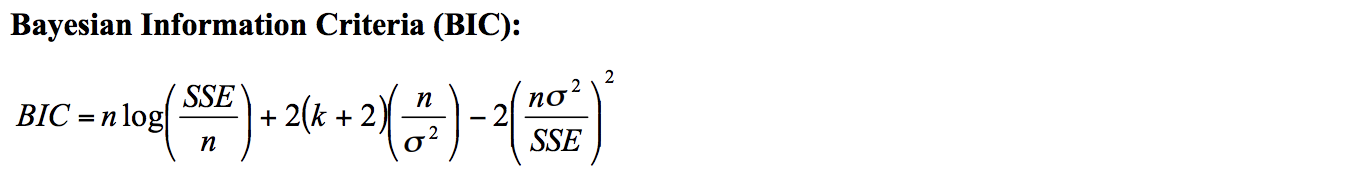


Here $\sigma^2$ is the variance of the regression model that includes all the available variables in the dataset.

It has three sum terms. The first is the same as in AIC and SBIC. The second and third are more complex are more grounded in statistical and information theoretic criteria.

We still prefer the model with the lowest value for the BIC criterion.

sklearn library computes the BIC criterion for the regression models. 

k = number of variables
n = number of observations
BIC = n*ln(sse/n) + k*ln(n)

For the five models that we have crerated the BIC values are:

------
-------


In [ ]:
def compute_bic(kmeans,X,c):
   
    n=X.shape[0];
    d=X.shape[1];
    print (c,n, d);

    BIC = n*math.log(kmeans.inertia_/n) + math.log(n)*c*(d+1)
    
    return(BIC)

In [ ]:
from scipy.spatial import distance
def plotBIC(x, y):
    # plotting the points
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('No of clusters')
    # naming the y axis
    plt.ylabel('BIC value')

    # giving a title to my graph
    plt.title('Graph showing BIC vs No of clusters')
    
    # function to show the plot
    plt.show()
    
def compute_bic1(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)
    
    BIC = n*math.log(SSE/n) + math.log(n)*c*(d+1)
    
    
    return(BIC)


In [ ]:
import sys
def find_best_model(feature_values):
    best_aic = sys.maxsize
    iter_aic = sys.maxsize-1
    best_features = []
    feature_col = []
    temp_features = feature_values
    
    regressor = LinearRegression()
    i = 1
    while iter_aic < best_aic:
        
        #print("iteration "+str(i)+" -> "+str(iter_aic))
        
        best_features = feature_col
        
        #print("iteration "+str(i)+" -> iteraic: "+str(iter_aic)+" bestaic:"+str(best_aic))
        best_aic = iter_aic
        iter_aic = sys.maxsize
        temp_features = [x for x in feature_values if x not in best_features]
        
        print("iteration "+str(i)+" -> "+ str(best_features))
        for feature in temp_features:
            
            feature_col = best_features+[feature]
          
            regressor_list.append(regressor.fit(Features_train[feature_col], Quality_train))

            model = sm.OLS(Quality_train, Features_train[feature_col])

            result = model.fit()

            if result.aic < iter_aic :
                best_model = model
                best_results = results
                iter_aic = result.aic
        i=i+1
    
    return best_features

In [ ]:
rs = find_best_model(list(Features)[0:10])

In [ ]:


data_g = pd.read_csv('C:/Users/kisha/Documents/Intelligent_Data_Analysis/Assignment_4/HW4GaussianClustersData.csv')

data_g.head()


#Need a better way to print than the one below. Will figure it out eventually. Kiran might have inputs 
Don't run Below code. Hence commented out check the link. 

In [ ]:
#plot data with seaborn (don't add a legend yet)
###facet = sns.lmplot(data=data_g, x='X', y='Y', 
###                   fit_reg=False, legend=False)

#add a legend
###leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
###                         title="label", fancybox=True)
#change colors of labels
###for i, text in enumerate(leg.get_texts()):
###    plt.setp(text, color = customPalette[i])

https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

In [ ]:
f1 = data_g['X'].values
f2 = data_g['Y'].values
X = np.array(list(zip(f1, f2)))
plt.figure(figsize=(20,10))
plt.scatter(f1, f2, c='blue', s=7)


https://mubaris.com/posts/kmeans-clustering/

In [ ]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [ ]:

# Number of clusters
###k = ['3']
###C = []
###for k_value in list(k):
  # X coordinates of random centroids
###  C_x = np.random.randint(0, np.max(X)-20, size=k_value)
  # Y coordinates of random centroids
###  C_y = np.random.randint(0, np.max(X)-20, size=k_value)
###  C.append(np.array(list(zip(C_x, C_y)), dtype=np.float32))
  

In [ ]:
# Plotting along with the Centroids
###plt.scatter(f1, f2, c='#050505', s=7)
###plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
from copy import deepcopy
# To store the value of centroids when it updates

C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
# Number of clusters
k = 5
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
from copy import deepcopy
#To store the value of centroids when it updates

C_old = np.zeros(C.shape)
#Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
#Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
#Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
# Number of clusters
k = 7
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

from copy import deepcopy
#To store the value of centroids when it updates

C_old = np.zeros(C.shape)
#Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
#Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
#Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

Run the k-means algorithm for k = 3, 5, 7, 9, 11, 13, 15, 17 and 19. Plot the total SSE and BIC values for the above values of k. What is the best number of clusters for this dataset? How did you find the best number of clusters, briefly explain.

In [ ]:
cc = [3, 5, 7, 9, 11, 13, 15, 17, 19]
X

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
c = {}
sse = {}
bic = {}
kmeans_list = {}

for k in cc:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeans_list[k] = kmeans
    c[k] = kmeans.cluster_centers_
    sse[k] = kmeans.inertia_
    bic[k] = compute_bic(kmeans,X,k)
    #print(compute_bic(kmeans,X))
#kmeans.labels_
#kmeans.predict([[0, 0], [4, 4]])


In [ ]:
sse

In [ ]:
bic

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(list(sse.keys()),list(sse.values()))

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(list(bic.keys()),list(bic.values()))

In [ ]:
best_kmeans = kmeans_list[11]
y_kmeans = best_kmeans.predict(X)
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [ ]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
'''X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]
'''
range_n_clusters = [11]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')
clustering.fit_predict(X)  

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='rainbow') 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage  

linked = linkage(X, 'single')

labelList = clustering.labels_#range(1, 10)

plt.figure(figsize=(20,10))  
dendrogram(linked,  
            orientation='top',p=11,
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

In [ ]:
# Number of clusters
k = 9
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
# Number of clusters
k = 13
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
# Number of clusters
k = 15
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
# Number of clusters
k = 17
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
# Number of clusters
k = 19
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import statsmodels.formula.api as smf
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import numpy as np
import math
from sklearn.metrics import silhouette_samples, silhouette_score

path_to_file='C:/Users/kisha/Documents/Intelligent_Data_Analysis/Assignment_4/HW4GaussianClustersData.csv'
data=pd.read_csv(path_to_file,  header=0)

X=np.array(data)
#print (X)
kmeans_models = []

def plot2dgrid(X):
    plt.scatter(X[:,0], X[:,1], label='True Position') 
    plt.show();

def plot2dgridClassify(X, kmeans):
    plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
    plt.show();

def makeClusters(k):
    kmeans = KMeans(n_clusters=k).fit(X);
    #print(kmeans.centroid) 
    
    #print(kmeans.label)

    #plot2dgridClassify(X, kmeans);
    kmeans_models.append(kmeans);
    return kmeans;

def plotSSE(x, y):
    # plotting the points
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('No of clusters')
    # naming the y axis
    plt.ylabel('SSE value')

    # giving a title to my graph
    plt.title('Graph showing SSE vs No of clusters')

    # function to show the plot
    plt.show()

def plotBIC(x, y):
    # plotting the points
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('No of clusters')
    # naming the y axis
    plt.ylabel('BIC value')

    # giving a title to my graph
    plt.title('Graph showing BIC vs No of clusters')
    
    # function to show the plot
    plt.show()


def silhouette(n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)



    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

#plot2dgrid(X)

cluster_no = [5, 7, 9, 11, 13, 15, 17, 19]
sse = []
for k in cluster_no:
    kmeans = makeClusters(k);
    sse.append(kmeans.inertia_);

plotSSE(cluster_no, sse)


n=X.shape[0];
d=X.shape[1];
print (n, d);


bic=[]
#print (len(cluster_no), len(sse))

for c, SSE in zip(cluster_no, sse):
    BIC = n*math.log(SSE/n) + math.log(n)*c*(d+1)
    bic.append(BIC);

plotBIC(cluster_no, bic)

#2c
best_index = len(cluster_no)-1
plot2dgridClassify(X, kmeans_models[best_index])
silhouette(cluster_no[best_index])


##https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python